# Exploratory Data Analysis

### Imports

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import pearsonr, ttest_ind

### Reading the dataset and describing it

In [102]:
df = pd.read_csv("../Dataset/predictive_maintenance.csv")
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Changing the column names as per use-case

In [105]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [106]:
columns = {
    "UDI": "id",
    "Product ID": "product_id",
    "Type": "product_quality", # L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
    "Air temperature [K]": "air_temperature",
    "Process temperature [K]": "process_temperature",
    "Rotational speed [rpm]": "rpm",
    "Torque [Nm]": "torque",
    "Tool wear [min]": "tool_wear",
    "Target" : "target",
    "Failure Type" : "failure_type",
    }

In [107]:
df.rename(columns=columns, inplace=True)
df.head(10)

,id,product_id,product_quality,air_temperature,process_temperature,rpm,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


### Unique values of columns

In [108]:
df.columns

Index(['id', 'product_id', 'product_quality', 'air_temperature',
       'process_temperature', 'rpm', 'torque', 'tool_wear', 'target',
       'failure_type'],
      dtype='object')

In [109]:
req_columns = ['product_quality', 'air_temperature',
       'process_temperature', 'rpm', 'torque', 'tool_wear', 'target',
       'failure_type']

In [110]:
for column in req_columns:
    print(column)
    print(df[column].unique())
    print()

product_quality
['M' 'L' 'H']

air_temperature
[298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]

process_temperature
[308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 306.2 306.1 306.  305.9 305.8 305.7 310.3 310.4
 310.5 310.6 310.7 310.8 310.9 311.  311.1 311.2 311.3 311.4 311.5 311.6
 3

### Physical factors

In [111]:
df_phyical_factors = df[["air_temperature", "process_temperature", "rpm", "torque", "tool_wear"]]
df_phyical_factors

,air_temperature,process_temperature,rpm,torque,tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [112]:
df_phyical_factors.isna().sum()

air_temperature        0
process_temperature    0
rpm                    0
torque                 0
tool_wear              0
dtype: int64

In [113]:
df_phyical_factors.isnull().sum()

air_temperature        0
process_temperature    0
rpm                    0
torque                 0
tool_wear              0
dtype: int64

### Describe on Physical factors

In [114]:
df_phyical_factors.describe().T

,count,mean,std,min,25%,50%,75%,max
air_temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
process_temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0


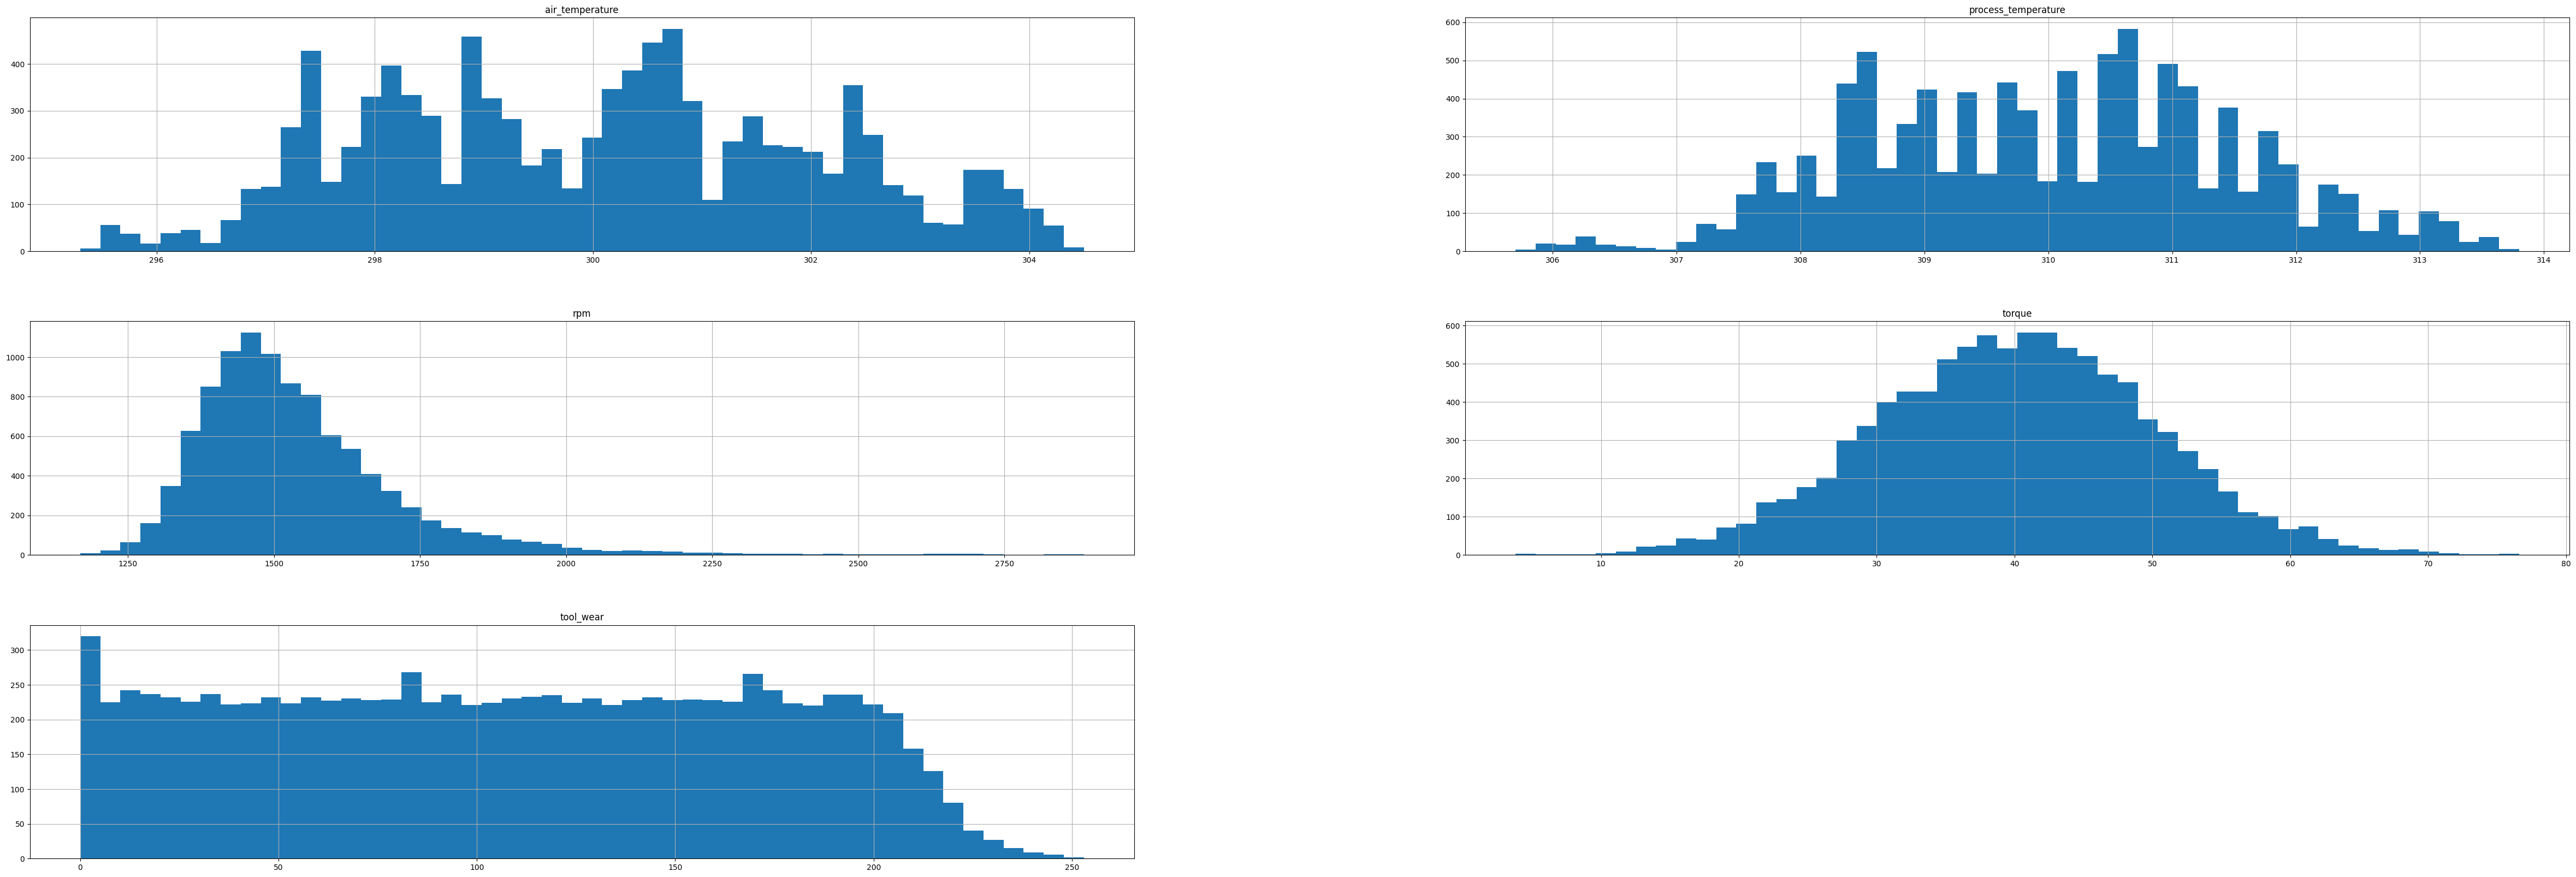

In [115]:
df_phyical_factors.hist(bins=50, figsize=(60, 20))
plt.show()

In [116]:
px.histogram(df_phyical_factors, x="air_temperature", nbins=50)

In [117]:
for column in df_phyical_factors.columns:
    fig = px.histogram(df_phyical_factors, x=column, nbins=50)
    fig.show()


C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\672425753.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




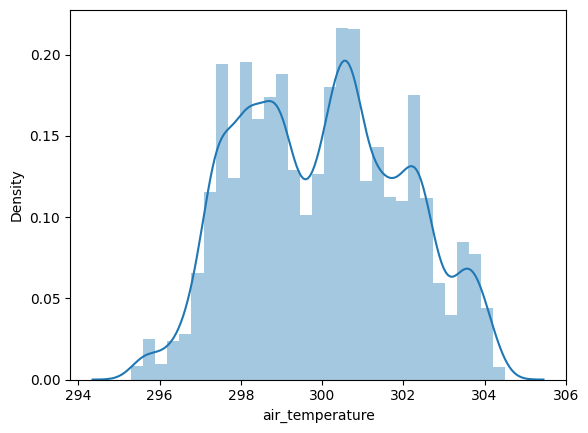

C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\672425753.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




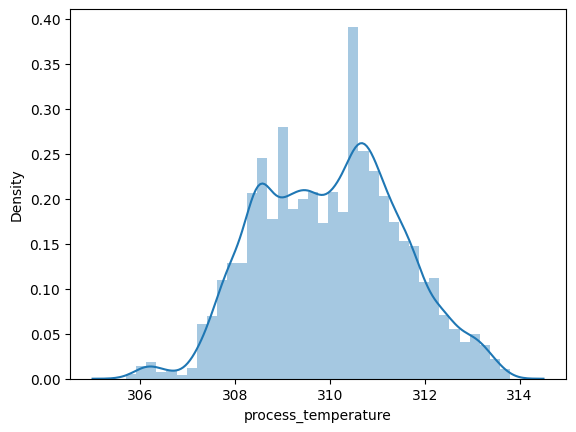

C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\672425753.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




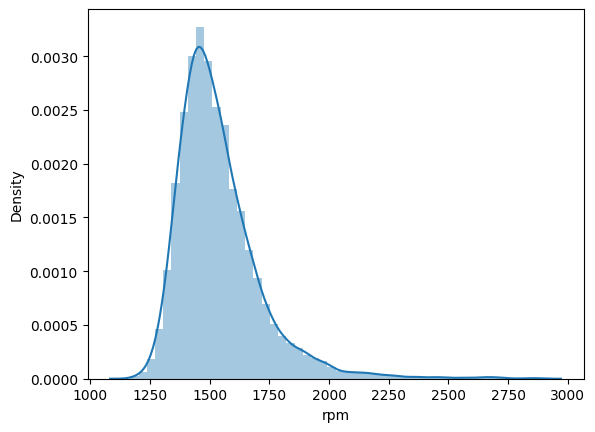

C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\672425753.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




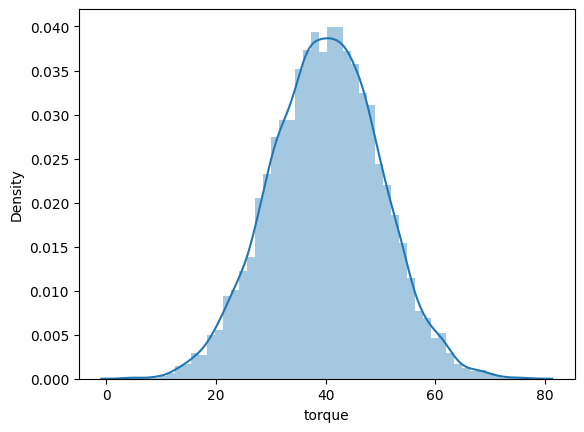

C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\672425753.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




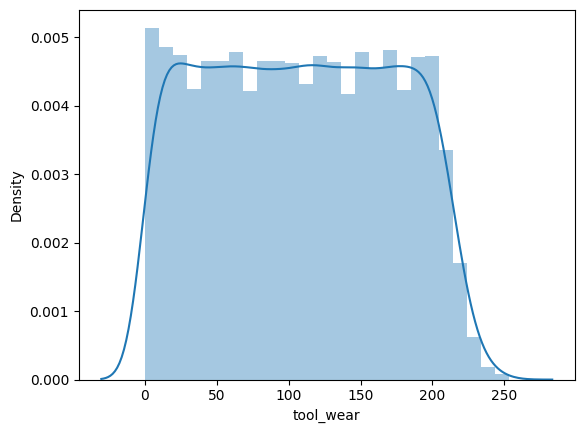

In [118]:
for column in df_phyical_factors.columns:
    sns.distplot(df_phyical_factors[column], label=column)
    plt.show()
plt.show()

### Bivariate Analysis

In [119]:
fig_temp = px.scatter(df_phyical_factors, x="air_temperature", y="process_temperature", color=df["target"])
fig_temp.show()

<Axes: xlabel='air_temperature', ylabel='process_temperature'>

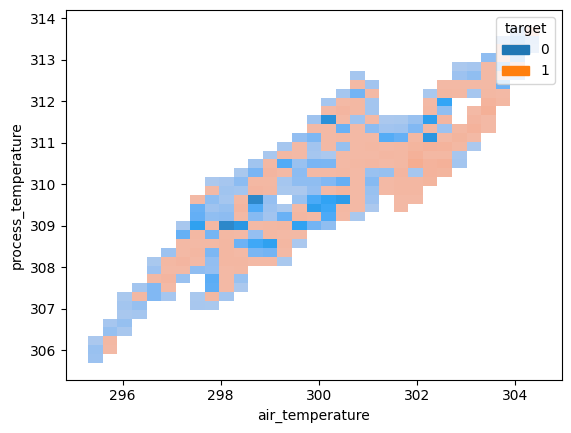

In [120]:
sns.histplot(df, x = "air_temperature", y = "process_temperature", hue = "target")

### Realationship between Air Temperture and Process Temperature

H0: There is no statistical relationship between Air Temperture and Process Temperature (correlation == 0)

H1: There is a statistical relationship between Air Temperture and Process Temperature (correlation != 0)

In [121]:
x = df_phyical_factors["air_temperature"]
y = df_phyical_factors["process_temperature"]

In [122]:
corr, p_value = pearsonr(x,y)
print(corr, p_value)

0.8761071581166642 0.0


In [123]:
if p_value < 0.05:
    print("Reject H0: Significant relationship exists")
else:
    print("Fail to reject H0: No significant relationship")

Reject H0: Significant relationship exists


#### There is a **statistical relationship** between Air Temperture and Process Temperature

In [124]:
df_temp = df[["air_temperature", "process_temperature", "failure_type", "target"]]
df_temp.head(10)

,air_temperature,process_temperature,failure_type,target
0,298.1,308.6,No Failure,0
1,298.2,308.7,No Failure,0
2,298.1,308.5,No Failure,0
3,298.2,308.6,No Failure,0
4,298.2,308.7,No Failure,0
5,298.1,308.6,No Failure,0
6,298.1,308.6,No Failure,0
7,298.1,308.6,No Failure,0
8,298.3,308.7,No Failure,0
9,298.5,309.0,No Failure,0


In [125]:
df_temp["temperature_diff"] = df_temp["process_temperature"] - df_temp["air_temperature"]
df_temp.head(10)

C:\Users\Debesh Pramanick\AppData\Local\Temp\ipykernel_25236\2182184859.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,air_temperature,process_temperature,failure_type,target,temperature_diff
0,298.1,308.6,No Failure,0,10.5
1,298.2,308.7,No Failure,0,10.5
2,298.1,308.5,No Failure,0,10.4
3,298.2,308.6,No Failure,0,10.4
4,298.2,308.7,No Failure,0,10.5
5,298.1,308.6,No Failure,0,10.5
6,298.1,308.6,No Failure,0,10.5
7,298.1,308.6,No Failure,0,10.5
8,298.3,308.7,No Failure,0,10.4
9,298.5,309.0,No Failure,0,10.5


In [136]:
df_temp_failure = df_temp.loc[
    (df_temp["target"] == 1) & (df_temp["failure_type"] == "Heat Dissipation Failure"),
    ["temperature_diff", "failure_type", "target"]
]

df_temp_failure.head(10)


,temperature_diff,failure_type,target
3236,8.6,Heat Dissipation Failure,1
3760,8.6,Heat Dissipation Failure,1
3787,8.5,Heat Dissipation Failure,1
3793,8.6,Heat Dissipation Failure,1
3806,8.6,Heat Dissipation Failure,1
3814,8.5,Heat Dissipation Failure,1
3829,8.6,Heat Dissipation Failure,1
4078,8.6,Heat Dissipation Failure,1
4080,8.4,Heat Dissipation Failure,1
4081,8.4,Heat Dissipation Failure,1


In [140]:
df_temp.loc[df_temp["target"] == 0, ["failure_type", "temperature_diff", "target"]].head(10)

,failure_type,temperature_diff,target
0,No Failure,10.5,0
1,No Failure,10.5,0
2,No Failure,10.4,0
3,No Failure,10.4,0
4,No Failure,10.5,0
5,No Failure,10.5,0
6,No Failure,10.5,0
7,No Failure,10.5,0
8,No Failure,10.4,0
9,No Failure,10.5,0


In [138]:
df_temp_failure["temperature_diff"].mean()


8.23125

In [139]:
df_temp.loc[df_temp["target"] == 0, ["temperature_diff"]].mean()

temperature_diff    10.021571
dtype: float64

Inferences:
- Normally, the process temperature is about 10 K higher than air temperature (as per dataset generation rules).

- When the difference shrinks (closer to ~8 K instead of ~10 K), it may indicate poor heat dissipation.

- This aligns with the idea that Heat Dissipation Failures occur when the machine cannot maintain the expected temperature gap.

#### Is smaller temperature difference is a cause of failure (machine overheats because heat isn’t dissipated properly), or just a symptom (failure happens, and then the temperature difference shrinks?

- H0: There is no significant difference in mean temperature_diff between failed machines (target = 1) and non-failed machines (target = 0).

- H1: There is a significant difference in mean temperature_diff between failed and non-failed machines.

In [143]:
failures = df_temp.loc[df_temp["target"] == 1, "temperature_diff"]
non_failures = df_temp.loc[df_temp["target"] == 0, "temperature_diff"]

In [144]:
t_stat, p_val = ttest_ind(failures, non_failures, equal_var=False)
t_stat, p_val

(-9.646334154906233, 1.0385050034401234e-19)

In [145]:
alpha = 0.05  # significance level
if p_val < alpha:
    print("Reject H0: There is a significant difference in temperature_diff between failures and non-failures.")
else:
    print("Fail to reject H0: No significant difference in temperature_diff between failures and non-failures.")

Reject H0: There is a significant difference in temperature_diff between failures and non-failures.


Since your observed means are quite different (8.23 vs 10.02), it’s very likely the p‑value will be < 0.05.
That would imply:

- Machines that fail tend to have lower temperature differences.

- This supports the hypothesis that poor heat dissipation is a contributing factor to failures.

In [163]:
df_failure = df[df.target == 1]
x = df_failure.id
y = df_failure.air_temperature
y1 = df_failure.process_temperature

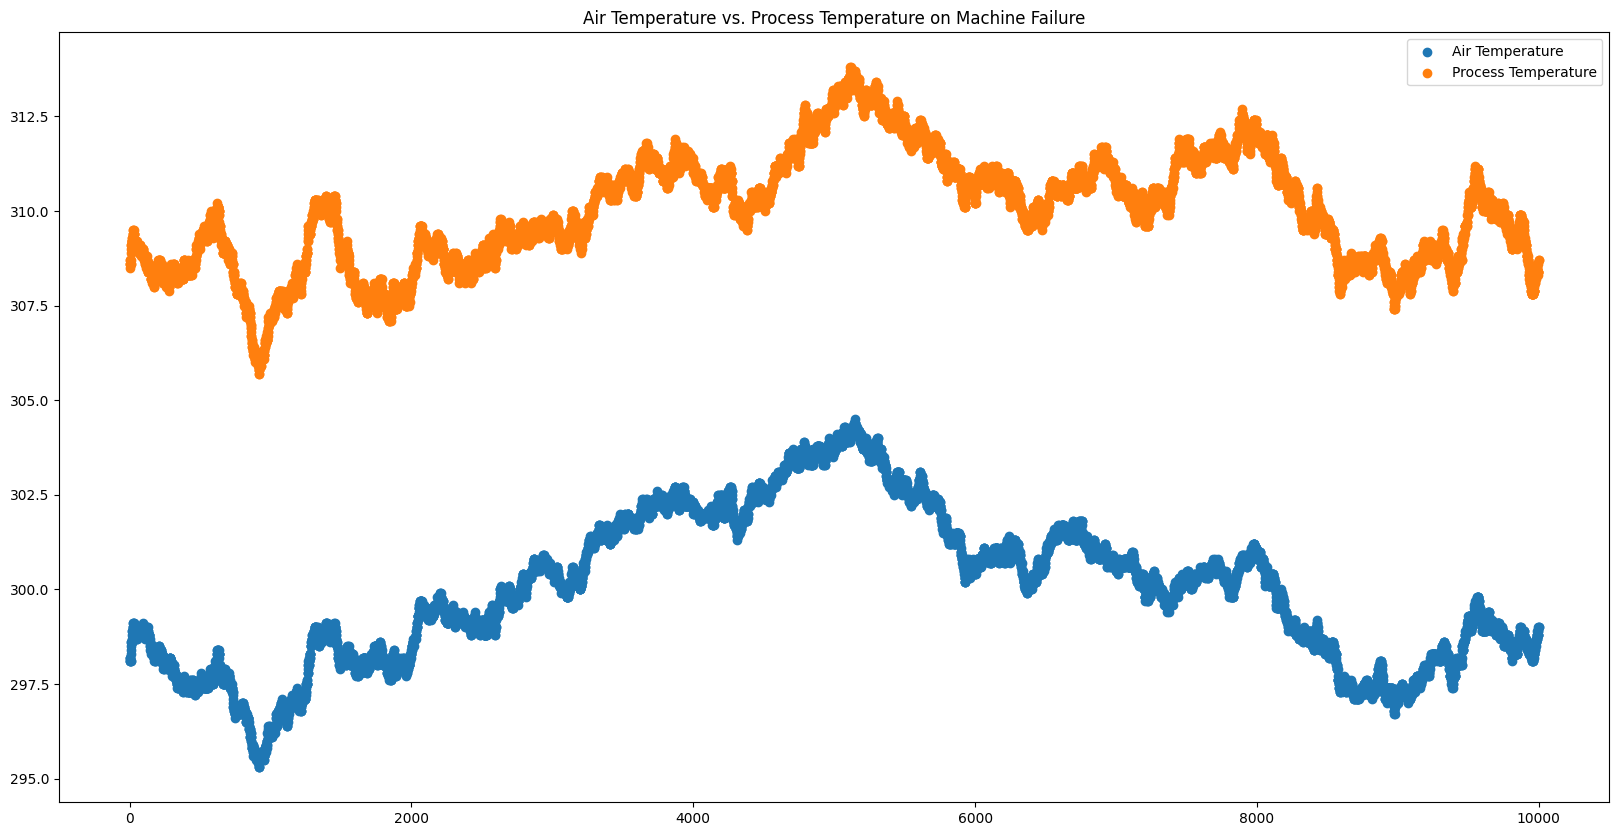

In [169]:
plt.figure(figsize=(20, 10))
plt.scatter(x,y, label="Air Temperature")
plt.scatter(x,y1, label="Process Temperature")
plt.title("Air Temperature vs. Process Temperature on Machine Failure")
plt.legend()
plt.show()

In [167]:
df_running = df[df.target == 0]
x = df_running.id
y = df_running.air_temperature
y1 = df_running.process_temperature

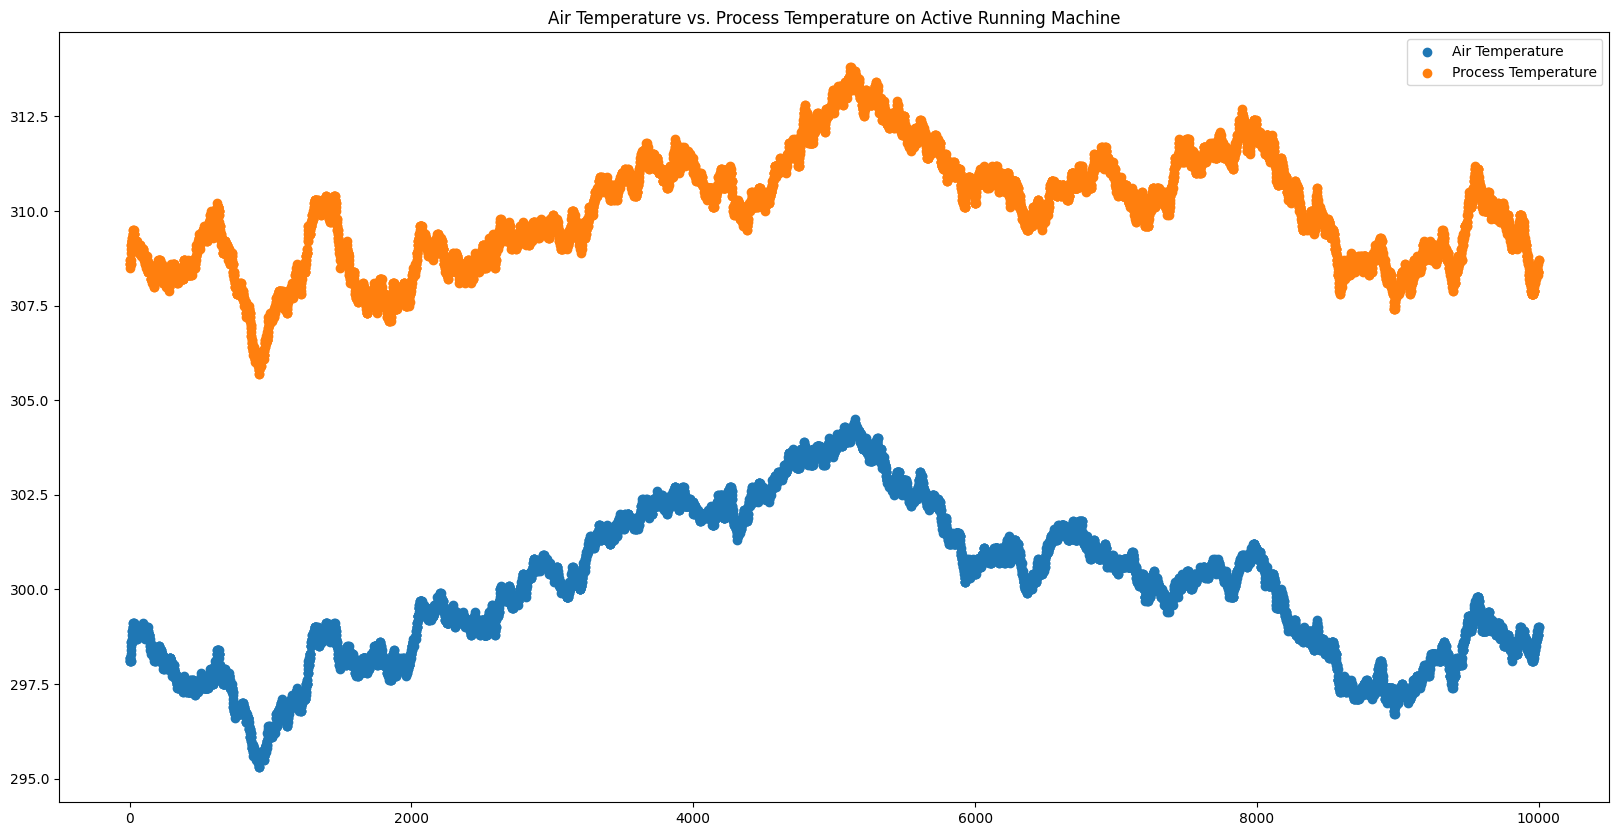

In [170]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, label="Air Temperature")
plt.scatter(x, y1, label="Process Temperature")
plt.title("Air Temperature vs. Process Temperature on Active Running Machine")
plt.legend()
plt.show()

In [148]:
df_temp()

,air_temperature,process_temperature,failure_type,target,temperature_diff
0,298.1,308.6,No Failure,0,10.5
1,298.2,308.7,No Failure,0,10.5
2,298.1,308.5,No Failure,0,10.4
3,298.2,308.6,No Failure,0,10.4
4,298.2,308.7,No Failure,0,10.5
...,...,...,...,...,...
9995,298.8,308.4,No Failure,0,9.6
9996,298.9,308.4,No Failure,0,9.5
9997,299.0,308.6,No Failure,0,9.6
9998,299.0,308.7,No Failure,0,9.7


In [159]:
df_temp.loc[df["target"] == 1,["temperature_diff"]]

,temperature_diff
50,10.2
69,10.1
77,10.1
160,9.8
161,9.8
...,...
9758,11.2
9764,11.0
9822,10.9
9830,11.0


In [158]:
df_temp.loc[df_temp["target"] == 1, "temperature_diff"]

50      10.2
69      10.1
77      10.1
160      9.8
161      9.8
        ... 
9758    11.2
9764    11.0
9822    10.9
9830    11.0
9974     9.6
Name: temperature_diff, Length: 339, dtype: float64

### Rotational Speed (rpm)

In [173]:
df.columns

Index(['id', 'product_id', 'product_quality', 'air_temperature',
       'process_temperature', 'rpm', 'torque', 'tool_wear', 'target',
       'failure_type'],
      dtype='object')

In [174]:
df_rotation = df[["rpm", "failure_type", "target"]]
df_rotation.head(10)

,rpm,failure_type,target
0,1551,No Failure,0
1,1408,No Failure,0
2,1498,No Failure,0
3,1433,No Failure,0
4,1408,No Failure,0
5,1425,No Failure,0
6,1558,No Failure,0
7,1527,No Failure,0
8,1667,No Failure,0
9,1741,No Failure,0


#### Rotation Failures

In [177]:
df_rotation_failure = df_rotation[df.target == 1]
df_rotation_failure.head(10)

,rpm,failure_type,target
50,2861,Power Failure,1
69,1410,Power Failure,1
77,1455,Tool Wear Failure,1
160,1282,Overstrain Failure,1
161,1412,Overstrain Failure,1
168,1433,Power Failure,1
194,2678,Power Failure,1
207,1421,Power Failure,1
242,1348,Overstrain Failure,1
248,1362,Overstrain Failure,1


In [200]:
px.histogram(df_rotation_failure, x="rpm", color="failure_type")

<Axes: xlabel='rpm', ylabel='Count'>

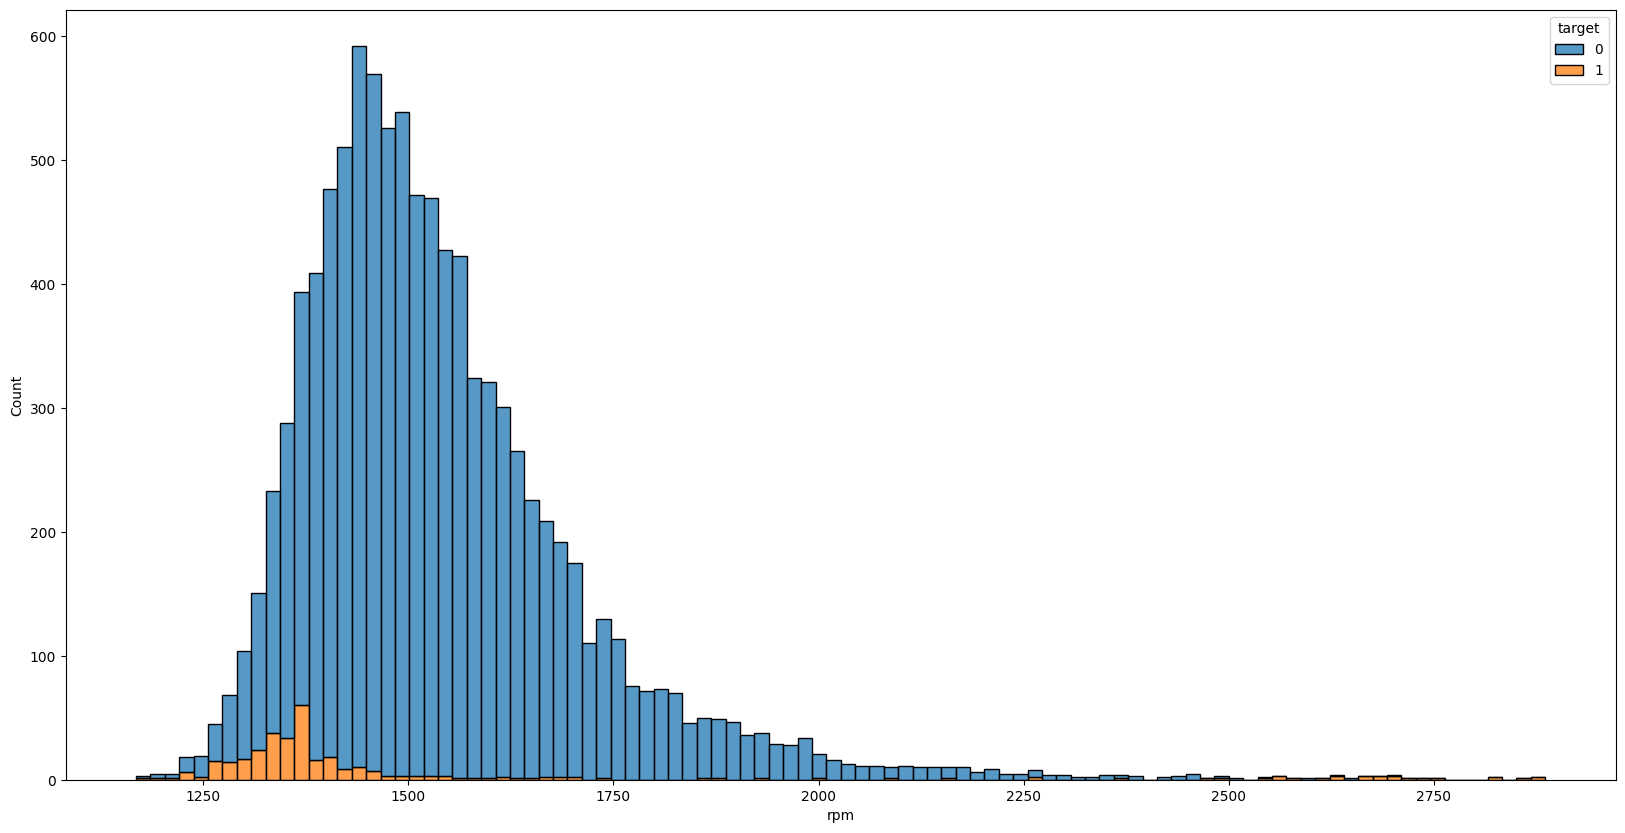

In [201]:
plt.figure(figsize=(20, 10))
sns.histplot(df_rotation, x="rpm", hue="target", multiple="stack")